In [1]:
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('pep.csv')
data = data.reindex(index=data.index[::-1])
data.index = range(828)
print data.head()

         Date       Open       High        Low      Close   Volume  Adj Close
0  2014-01-02  82.930000  82.989998  81.820000  82.099998  3275900  74.828177
1  2014-01-03  82.120003  82.870003  82.120003  82.239998  3287200  74.955776
2  2014-01-06  82.199997  82.610001  82.080002  82.279999  3888400  74.992234
3  2014-01-07  82.620003  83.989998  82.610001  83.480003  6332400  76.085951
4  2014-01-08  83.330002  83.620003  82.809998  83.239998  5653300  75.867203


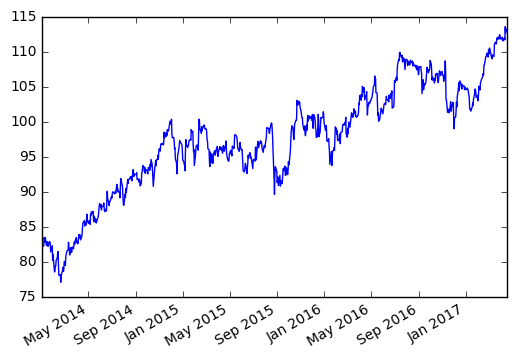

In [4]:
fig, ax = plt.subplots()
ax.plot_date(data['Date'], data['Close'], '-')
fig.autofmt_xdate()
plt.show()

In [3]:
#define variables
initial_value = 1000000 #trade size--1000 shares of coca 'KO' stock, assume I have enough fund to buy 1000 shares
mp = 0 #market position--indicate wheter I have any KO stocks on hands: 0 means none shares; 1 menas have shares
iD = 0 #initial date--indicate the index of the first date during calculation 
Ratio = np.zeros((51,2)) #profit ratio
    
#define functions
def min_per_day(x):
    y = data.iloc[x].as_matrix()
    mpd = y[1:4].min()
    return mpd

def close_p(x):
    cp = data.iloc[x][4]
    return cp

def open_p(x):
    op = data.iloc[x][1]
    return op

In [4]:
for k in range(51):
    iD = 0
    initial_value = 1000000
    Stop_pct = 0.005 + k * 0.0001
    while (iD <= 820):        
        if mp == 0:
            df_temp = data[iD:iD+5]
            HH = df_temp['High'].max()
            #print HH
            iD = iD + 5
#            test = iD

#            for n in range(0,5):
#                if HH < open_p(iD+n):
#                    break
#            if test + 4 == iD + n:
#                iD = iD + n + 1
#                mp = 0

#            else:
#                iD = iD + n
            while HH > open_p(iD) and iD<=820:
                iD += 1
            #print iD
            ep = open_p(iD) #ep is entry price
            #print ep
            Ts = initial_value / ep
            #print Ts
            pp = ep #pp is the previous peak price
            mp = 1

        if mp == 1:
            if close_p(iD) > pp:
                pp = close_p(iD)
            #print pp
            sp = pp * (1 - Stop_pct) #sp is the stop-point of trading, shares sold at this price
            iD = iD + 1

            while sp < min_per_day(iD) and iD<=820:
                iD = iD + 1
            #print iD
            end_value = open_p(iD) * Ts #the value of my fund after selling all shares
            #print open_p(iD),end_value
            initial_value = end_value
            mp = 0
#    if mp == 1:
#        end_value = sp * Ts
#    if mp == 0:
#        end_value = initial_value

    
    Ratio[k][0] = Stop_pct
    Ratio[k][1] = (end_value - 1000000)/1000000
    
#    mp = 0
#    iD = 0
    #break

83.989998
72
84.419998
11845.5345142
84.769997
413
91.580002 1084814.0745
94.139999
440
94.199997
11516.0733445
94.199997
441
93.169998 1072952.53048
99.010002
452
99.699997
10761.8110608
100.18
453
99.949997 1075642.98324
103.440002
566
103.800003
10362.6488647
103.82
567
103.769997 1075332.0416
105.769997
593
106.260002
10119.8195121
106.260002
594
106.129997 1074016.41446
106.400002
631
106.589996
10076.1464937
106.589996
677
106.019997 1068273.02104
106.220001
685
106.300003
10049.6048061
107.129997
694
108.309998 1088472.67645
108.370003
790
109.370003
9952.20486965
109.410004
800
109.169998 1086482.18571
109.800003
806
111.089996
9780.19826119
111.139999
821
112.120003 1096555.85839
83.989998
72
84.419998
11845.5345142
84.769997
413
91.580002 1084814.0745
94.139999
440
94.199997
11516.0733445
94.199997
441
93.169998 1072952.53048
99.010002
452
99.699997
10761.8110608
100.18
466
100.07 1076934.43285
100.290001
475
100.519997
10713.6337544
100.93
476
101.519997 1087648.06661
102.15

In [5]:
Return_Ratio = pd.DataFrame({'Stop Precent':Ratio[:,0],'Return Ratio':Ratio[:,1],})
Return_Ratio = Return_Ratio[['Stop Precent','Return Ratio']]

In [6]:
Return_Ratio

,Stop Precent,Return Ratio
0,0.0050,0.096556
1,0.0051,0.115359
2,0.0052,0.115441
3,0.0053,0.115441
4,0.0054,0.115441
5,0.0055,0.115441
6,0.0056,0.115441
7,0.0057,0.115441
8,0.0058,0.099191
9,0.0059,0.099191


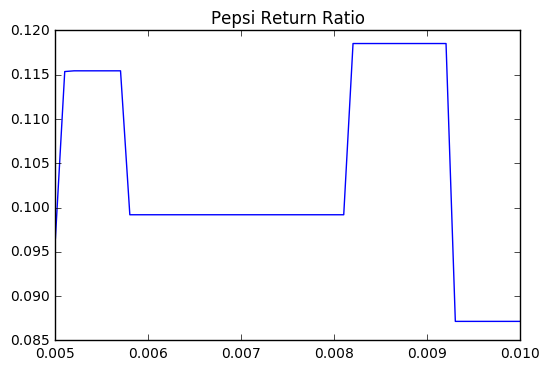

In [7]:
fig, ax = plt.subplots()
ax.plot(Ratio[:,0],Ratio[:,1])
ax.set_title('Pepsi Return Ratio')
plt.show()